## 三角法、大津法、自适应阈值分割

（采用ksize = 5的中值滤波）

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    
def imshow(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

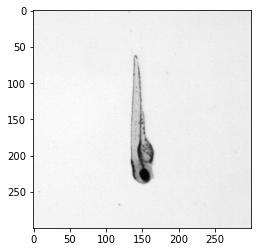

In [3]:
# 读取灰度图像
img_gray = cv.imread('data/test2.jpg', 0)
show(img_gray)

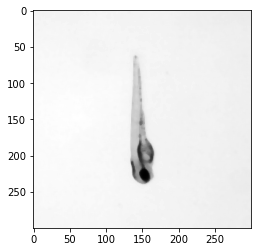

In [4]:
# 中值滤波
img_median = cv.medianBlur(img_gray, ksize=5)
show(img_median)

### 三角法阈值分割

thresh = 190.0


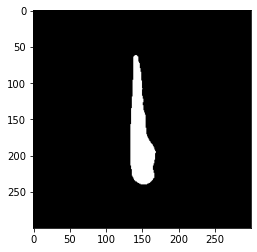

In [5]:
# 三角法阈值分割
th_triangle, img_bin_triangle = cv.threshold(img_median, -1, 255, cv.THRESH_TRIANGLE)
th_triangle, img_bin_triangle = cv.threshold(img_bin_triangle, th_triangle, 255, cv.THRESH_BINARY_INV)
print(f"thresh = {th_triangle}")
show(img_bin_triangle)

### 大津法阈值分割

对于给定的阈值$T$，可以将图像分为目标和背景。其中背景点数占图像比例为 $p_0$，平均灰度值为 $m_0$。而目标点数占图像比例为 $p_1$，平均灰度值为 $m_1$，其中满足
$$
p_0 + p_1 = 1
$$
整幅图像的平均灰度值为常数，跟阈值无关，且为
$$
\overline m = p_0m_0 + p_1m_1
$$
类间方差为
$$
\sigma^2 = p_0(m_0 - \overline m)^2 + p_1(m_1 - \overline m)^2
$$
代入 $p_0 + p_1 = 1$ 和 $\overline m$，可化简为
$$
\sigma^2 = p_0p_1(m_0 - m_1)^2
$$
遍历灰度值，找出能使 $\sigma^2$ 最大的值。

thresh = 151.0


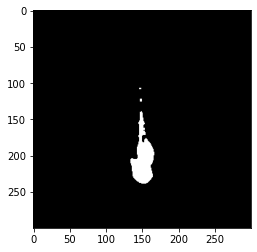

In [10]:
# 大津法阈值分割
th_otsu, img_bin_otsu = cv.threshold(img_median, -1, 255, cv.THRESH_OTSU)
th_otsu, img_bin_otsu = cv.threshold(img_median, th_otsu, 255, cv.THRESH_BINARY_INV)
print(f"thresh = {th_otsu}")
show(img_bin_otsu)

### 自适应阈值分割

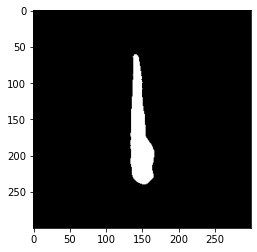

In [8]:
# 自适应阈值分割
blocksize = 40
thresh = 5
img_bin_adaptive = cv.adaptiveThreshold(img_median, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                       cv.THRESH_BINARY_INV, 2 * int(blocksize) + 1, int(thresh))
show(img_bin_adaptive)

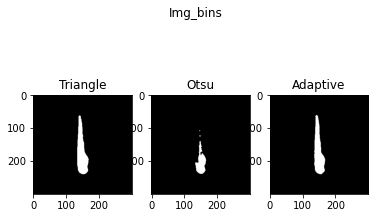

In [11]:
# 保存图片
plt.subplot(131), imshow(img_bin_triangle), plt.title('Triangle')
plt.subplot(132), imshow(img_bin_otsu), plt.title('Otsu')
plt.subplot(133), imshow(img_bin_adaptive), plt.title('Adaptive')
plt.suptitle('Img_bins')
plt.savefig('./data/img_bins.jpg')